In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [2]:
#importing dataset

data = pd.read_csv("C:/Users/TRANSFORMER/Desktop/Favorites/Downloads/Credit-Card-Dataset (1)/Credit-card-dataset/creditcard.csv")

#### Below we start the process of Exploratory Data Analysis. The dataset that we have has been checked for missing values and ranges of the features under consideration. You can also see detailed Exploratory data analysis in my feature engineering notebook. (The second one that I have shared)

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Below we check correlation of features and decide which features we could remove on the basis of high correlation.

In [4]:
corr = data.corr()

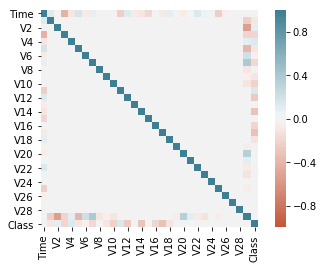

In [5]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

#### The above plot shows the correlation between features using a heatmap. Using a heatmap is a standard practice in feature correlation checking due to better visualization.

#### Now we further split the dataset in X and Y so as to further feed the datasets for feature engineering
#### We shall complete the feature engineering exercise using feature based, wrapper based and embedded methods. chi-squared = filter based, Recursive Feature Elimination = Wrapper based, Lasso and Random forest = Embedded

## I have shared a different jupyter notebook that mentions the above feature engineering steps completely as well. Please refer that for further insights. 

#### Here, we shall be working with chi-square test and recursive feature engineering

In [6]:
Y_data = data.loc[:,['Class']]

In [7]:
Y_data.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [8]:
X_data = data.iloc[:,1:30]

In [10]:
X_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [9]:
X_norm = MinMaxScaler().fit_transform(X_data)

In [11]:
print(X_norm)

[[9.35192337e-01 7.66490419e-01 8.81364903e-01 ... 4.18976135e-01
  3.12696634e-01 5.82379309e-03]
 [9.78541955e-01 7.70066651e-01 8.40298490e-01 ... 4.16345145e-01
  3.13422663e-01 1.04705276e-04]
 [9.35217023e-01 7.53117667e-01 8.68140819e-01 ... 4.15489266e-01
  3.11911316e-01 1.47389219e-02]
 ...
 [9.90904812e-01 7.64079694e-01 7.81101998e-01 ... 4.16593177e-01
  3.12584864e-01 2.64215395e-03]
 [9.54208999e-01 7.72855742e-01 8.49587129e-01 ... 4.18519535e-01
  3.15245157e-01 3.89238944e-04]
 [9.49231759e-01 7.65256401e-01 8.49601462e-01 ... 4.16466371e-01
  3.13400843e-01 8.44648509e-03]]


### Implementing recursive feature elimination technique to get the important number of features

In [12]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=20, step=10, verbose=5)
rfe_selector.fit(X_norm, Y_data)
rfe_support = rfe_selector.get_support()
rfe_feature = X_data.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 29 features.


C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


20 selected features


In [13]:
print(rfe_feature)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16', 'V17', 'V20', 'V21', 'V22', 'V23', 'V28']


In [14]:
chi_selector = SelectKBest(chi2, k=20)
chi_selector.fit(X_norm, Y_data)
chi_support = chi_selector.get_support()
chi_feature = X_data.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

20 selected features


In [15]:
print(chi_feature)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'V24', 'V26', 'Amount']


In [16]:
X_data = data.loc[:,['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'V24', 'V26', 'Amount']]

### Now, we start implementation of Random Forest Algorithm

In [17]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2)

In [19]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(227845, 20) (227845, 1)
(56962, 20) (56962, 1)


In [20]:
from sklearn import model_selection

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
rfc_predict = rfc.predict(X_test)

### Evaluating Performance of Random Forest Algorithm

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
rfc_cv_score = cross_val_score(rfc, X_data, Y_data, cv=10, scoring='roc_auc')

C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionW

In [24]:
print(rfc_cv_score)

[0.97876125 0.94981535 0.98976613 0.86705623 0.87725744 0.91611736
 0.96921404 0.90772468 0.89755434 0.87711351]


#### The confusion matrix below summarizes the amount of False Positives and the amount of False Negatives along with the true neagtives and true positives.

In [25]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

=== Confusion Matrix ===
[[56879     4]
 [   15    64]]




#### Below we can see the metrics of the random forest model like Precision, Recall, F-1 Score

In [26]:
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56883
           1       0.94      0.81      0.87        79

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962





#### Below we get the scores for Area under the Receiver Operating Characteristic Curve. This is best metric to measure the performance of classification algorithms

In [27]:
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')

=== All AUC Scores ===
[0.97876125 0.94981535 0.98976613 0.86705623 0.87725744 0.91611736
 0.96921404 0.90772468 0.89755434 0.87711351]




In [28]:
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9230380347863856


## As you can see above I get a AUC score of 0.9230 for Random Forest Classifier. This suggests that our random forest clasifier is performing with 92.30 % accuracy.

#### Implementing logistic regression model as below

In [29]:
# implementing logistic regression algorithm

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
A_train = sc_X.fit_transform(X_train)
A_test = sc_X.fit_transform(X_test)



In [30]:
B_train = y_train
B_test = y_test

In [31]:
#fitting logistic regression to the training set

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(A_train,B_train)

C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
B_pred = classifier.predict(A_test)

In [33]:
cm = confusion_matrix(B_test,B_pred)

In [34]:
cm

array([[56875,     8],
       [   27,    52]], dtype=int64)

#### Below we can see the metrics of the logistic regression model like Precision, Recall, F-1 Score. We have also used the ROC (Receiver Operator Characteristic) area under the curve metric after this

In [35]:
print("=== Classification Report ===")
print(classification_report(B_test, B_pred))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56883
           1       0.87      0.66      0.75        79

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.93      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962





In [36]:
logistic_regression_cv_score = cross_val_score(classifier, X_data, Y_data, cv=10, scoring='roc_auc')

C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TRANSFORMER\Anaconda3

#### Below we get the scores for Area under the Receiver Operating Characteristic Curve. This is best metrci to measure the performance of classification algorithms

In [37]:
print("=== All AUC Scores ===")
print(logistic_regression_cv_score)
print('\n')

=== All AUC Scores ===
[0.99586241 0.88265968 0.99984855 0.95527675 0.91520477 0.98244658
 0.96918138 0.9667401  0.98045824 0.95990436]




In [38]:
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", logistic_regression_cv_score.mean())

=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9607582816862286


### Finally we get to see the accuracy of logistic regression algorithm in fraud classification as well. It is giving us a accuracy of 96.075 % ... but it is only representative of the sample dataset. When you use this on actual real world out of the sample dataset, we get approxiamtely 78 to 80% of accuracy. To improve your accurcy further suggestions would be to implement random undersampling of majority class (non-fraudulent transactions) combined with synthetic minority oversampling technique of minority class (Fraudulent transactions). This will help improve our model accuracy to approximately 83 - 85%.

### Although I have not used this on out-of-sample dataset we can expect the model accuracy to be around the above ranges when we work on out-of-sample dataset. Because the above 90% accuracy is only representative of the sample dataset and it could be high due to overfitting of the models. 

### Also, in actuality the Random Forest Model performs way better than Logistic Regression model as it can handle imbalanced dataset better than logistic regression model.

### This ends my project

